In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('~/Google Drive/Research Projects/Finished/LysisBuffers/data_exchange/lysis-buffer-samples.csv', index_col=0)

In [3]:
tpm = pd.read_csv('~/Google Drive/Research Projects/Finished/LysisBuffers/data_exchange/lysis-buffer-tpm.csv', index_col=0)

In [4]:
logexp = np.log10(tpm + 1)
logexp = logexp[sample_info.index]

In [5]:
import patsy

In [6]:
sample_info.head().T

,21681_1#18,21681_1#32,21681_1#48,21681_1#58,21681_1#12
detection_limit,inf,inf,inf,inf,inf
accuracy,-inf,-inf,-inf,-inf,-inf
ERCC_content,0,0,0,0,0
num_genes,7092,6990,469,6056,1025
MT_content,72193.3,82527.8,77319.3,97045.6,99507.8
rRNA_content,68.1274,41.7641,1905.97,41.2784,0
num_processed,680970,7287104,975356,3726116,27173
num_mapped,501237,6106642,670644,3081850,2018
percent_mapped,73.6063,83.8007,68.7589,82.7094,7.42649
global_fl_mode,321,1000,309,276,283


In [7]:
Y = patsy.dmatrix('np.log(num_genes) + np.log(num_mapped) + LB_type', sample_info, return_type='dataframe')
y = np.asarray(Y)

In [38]:
partial_logexp = logexp.iloc[:1000,:]

In [39]:
partial_logexp.shape

(1000, 96)

In [40]:
pd.melt(sample_info).head()

,variable,value
0,detection_limit,inf
1,detection_limit,inf
2,detection_limit,inf
3,detection_limit,inf
4,detection_limit,inf


In [41]:
pd.melt(sample_info, id_vars=['well', 'merge']).head()

,well,merge,variable,value
0,B06,sc_A,detection_limit,inf
1,C08,sc_B,detection_limit,inf
2,D12,sc_B,detection_limit,inf
3,E10,sc_B,detection_limit,inf
4,A12,sc_B,detection_limit,inf


In [42]:
partial_logexp.T.join(Y).head()

,ENSG00000283628,ENSG00000283077,ENSG00000283307,ENSG00000283184,ENSG00000283423,ENSG00000283583,ENSG00000283275,ENSG00000283452,ENSG00000283454,ENSG00000283033,...,Intercept,LB_type[T.B],sample_type[T.LBQCpos],sample_type[T.LBneg],sample_type[T.LBpos],sample_type[T.multicell],sample_type[T.sc],np.log(num_genes),np.log(num_mapped),percent_mapped
21681_1#18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.866723,13.124834,73.606326
21681_1#32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.852236,15.624888,83.800670
21681_1#48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.150603,13.415994,68.758894
21681_1#58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.708805,14.941041,82.709449
21681_1#12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.932448,7.609862,7.426490


In [43]:
partial_logexp.T.join(Y).columns

Index(['ENSG00000283628', 'ENSG00000283077', 'ENSG00000283307',
       'ENSG00000283184', 'ENSG00000283423', 'ENSG00000283583',
       'ENSG00000283275', 'ENSG00000283452', 'ENSG00000283454',
       'ENSG00000283033',
       ...
       'Intercept', 'LB_type[T.B]', 'sample_type[T.LBQCpos]',
       'sample_type[T.LBneg]', 'sample_type[T.LBpos]',
       'sample_type[T.multicell]', 'sample_type[T.sc]', 'np.log(num_genes)',
       'np.log(num_mapped)', 'percent_mapped'],
      dtype='object', length=1010)

In [44]:
long_data = pd.melt(partial_logexp.T.join(Y), id_vars=Y.columns.tolist())

In [45]:
long_data.head()

,Intercept,LB_type[T.B],sample_type[T.LBQCpos],sample_type[T.LBneg],sample_type[T.LBpos],sample_type[T.multicell],sample_type[T.sc],np.log(num_genes),np.log(num_mapped),percent_mapped,variable,value
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.866723,13.124834,73.606326,ENSG00000283628,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.852236,15.624888,83.800670,ENSG00000283628,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.150603,13.415994,68.758894,ENSG00000283628,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.708805,14.941041,82.709449,ENSG00000283628,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.932448,7.609862,7.426490,ENSG00000283628,0.0


In [46]:
long_data.shape[0]

96000

In [47]:
covars = long_data.drop(['variable', 'value'], 1)

In [48]:
covars.shape

(96000, 10)

In [49]:
genes = long_data.variable.astype('category')

In [50]:
genes.cat.categories.shape[0]

1000

In [51]:
y = long_data.value.values

In [52]:
y.shape[0]

96000

In [53]:
(genes.cat.codes + 1).head().values

array([971, 971, 971, 971, 971], dtype=int16)

In [54]:
covars.values

array([[  1.        ,   0.        ,   0.        , ...,   8.86672267,
         13.12483432,  73.60632627],
       [  1.        ,   1.        ,   0.        , ...,   8.85223584,
         15.62488759,  83.80067033],
       [  1.        ,   1.        ,   0.        , ...,   6.15060277,
         13.41599372,  68.75889419],
       ..., 
       [  1.        ,   1.        ,   0.        , ...,   8.73921612,
         15.17313843,  82.24837559],
       [  1.        ,   1.        ,   1.        , ...,   9.04629086,
         11.39189842,  39.04572617],
       [  1.        ,   1.        ,   0.        , ...,   8.82834762,
         15.54226171,  78.839769  ]])

In [55]:
import pickle

In [56]:
with open('ard-mllr.pkl', 'rb') as fh:
    model = pickle.load(fh)

In [57]:
partial_logexp.T.shape

(96, 1000)

In [58]:
long_data.shape

(96000, 12)

In [59]:
N = y.shape[0]
P = covars.shape[1]
G = genes.cat.categories.shape[0]
data = {
    'N': N,
    'P': P,
    'G': G,
    'x': covars.values,
    'y': y,
    'gene': genes.cat.codes.values + 1
}

In [60]:
v = model.vb(data=data)

In [61]:
df = pd.read_csv(v['args']['sample_file'].decode('ascii'), comment='#').dropna()
sdf = df.mean()

/Users/vs4/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
def extract_alpha(sdf):
    v_a = sdf[sdf.index.str.startswith('alpha.')]
    v_a.index = v_a.index.str.extract('alpha\.(\d+)', expand=False).map(int)

    return v_a

In [63]:
alpha = extract_alpha(sdf)
alpha.index = Y.columns
alpha

Intercept                   0.022264
LB_type[T.B]                0.027381
sample_type[T.LBQCpos]      0.089541
sample_type[T.LBneg]        0.105281
sample_type[T.LBpos]        0.087502
sample_type[T.multicell]    0.080116
sample_type[T.sc]           0.020324
np.log(num_genes)           0.013136
np.log(num_mapped)          0.016468
percent_mapped              0.005697
dtype: float64

In [34]:
sample_info.head().T

,21681_1#18,21681_1#32,21681_1#48,21681_1#58,21681_1#12
detection_limit,inf,inf,inf,inf,inf
accuracy,-inf,-inf,-inf,-inf,-inf
ERCC_content,0,0,0,0,0
num_genes,7092,6990,469,6056,1025
MT_content,72193.3,82527.8,77319.3,97045.6,99507.8
rRNA_content,68.1274,41.7641,1905.97,41.2784,0
num_processed,680970,7287104,975356,3726116,27173
num_mapped,501237,6106642,670644,3081850,2018
percent_mapped,73.6063,83.8007,68.7589,82.7094,7.42649
global_fl_mode,321,1000,309,276,283


In [35]:
Y = patsy.dmatrix('np.log(num_genes) + np.log(num_mapped) + LB_type + sample_type + percent_mapped', sample_info, return_type='dataframe')
y = np.asarray(Y)

In [36]:
partial_logexp = logexp.sample(1000, axis=0)

In [37]:
N, D = partial_logexp.T.shape
N, P = y.shape
data = {
    'N': N,
    'D': D,
    'x': partial_logexp.T,
    'P': P,
    'y': y.T
}

In [21]:
long_partial_logexp = pd.melt(partial_logexp.T)

In [25]:
c = long_partial_logexp.Name.astype('category')

In [37]:
c.cat.codes.values

array([90, 90, 90, ..., 80, 80, 80], dtype=int8)

In [39]:
long_partial_logexp.shape

(9600, 2)

In [114]:
v = model.vb(data=data)

In [115]:
df = pd.read_csv(v['args']['sample_file'].decode('ascii'), comment='#').dropna()
sdf = df.mean()

/Users/vs4/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
beta = extract_beta(sdf)
beta.index = Y.columns
beta / beta.sum()

Intercept                   0.039099
LB_type[T.B]                0.054816
sample_type[T.LBQCpos]      0.234175
sample_type[T.LBneg]        0.190868
sample_type[T.LBpos]        0.227730
sample_type[T.multicell]    0.184256
sample_type[T.sc]           0.040857
np.log(num_genes)           0.010623
np.log(num_mapped)          0.008712
percent_mapped              0.008863
dtype: float64

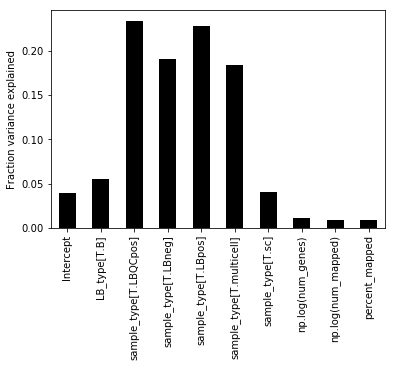

In [125]:
(beta / beta.sum()).plot(kind='bar', color='k');
plt.ylabel('Fraction variance explained');

In [118]:
beta_sum = beta.groupby(beta.index.str.split('[').str.get(0)).sum()

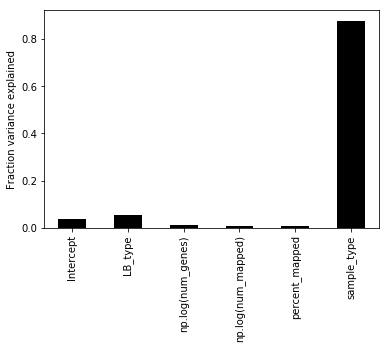

In [126]:
(beta_sum / beta_sum.sum()).plot(kind='bar', color='k');
plt.ylabel('Fraction variance explained');